In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles


In [5]:

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
# X_kpca = kpca.fit_transform(X)
# X_back = kpca.inverse_transform(X_kpca)
# pca = PCA()
# X_pca = pca.fit_transform(X)


reds = y == 0

blues = y == 1


In [14]:
np.random.seed(0)

kpca2 = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)

kpca2.fit(X[reds,:])

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=True, gamma=10, kernel='rbf',
          kernel_params=None, max_iter=None, n_components=None, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)

In [16]:
X[reds,:].shape


(200, 2)

In [15]:
kpca2.n_components, kpca2.alphas_.shape

(None, (200, 199))

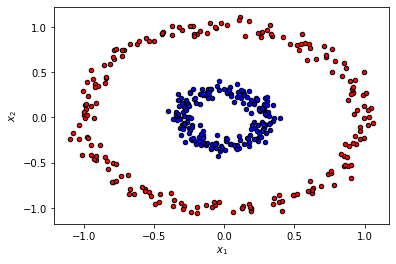

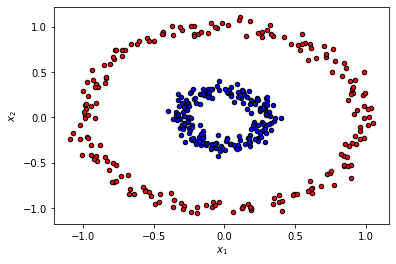

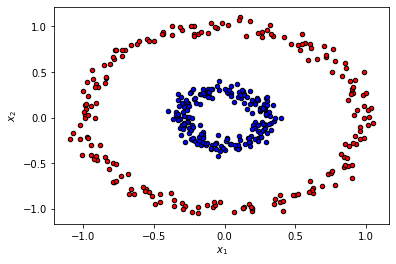

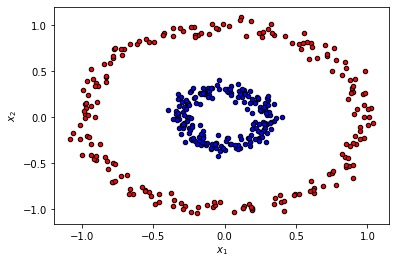

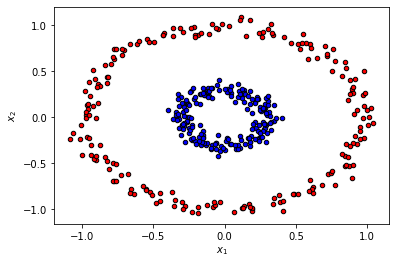

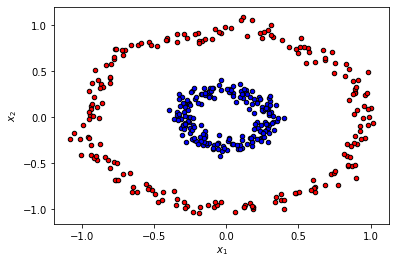

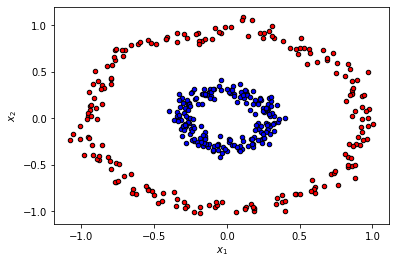

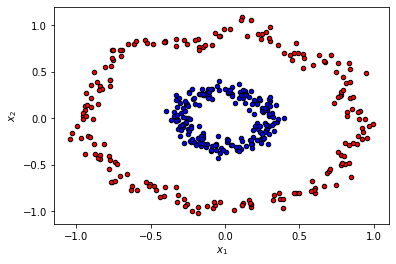

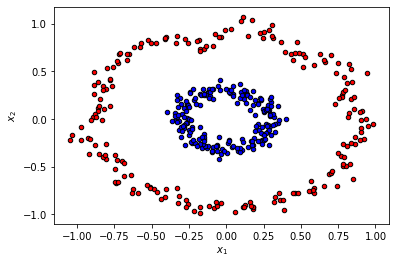

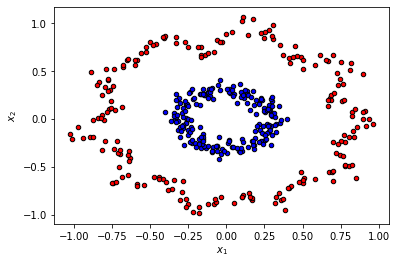

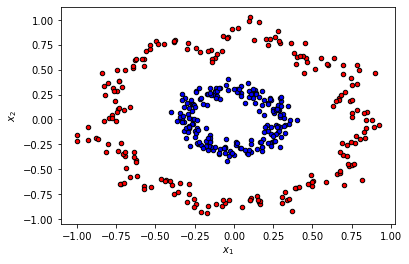

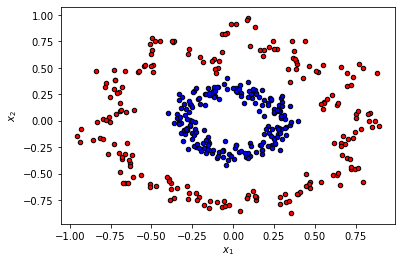

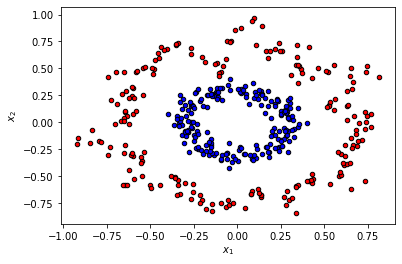

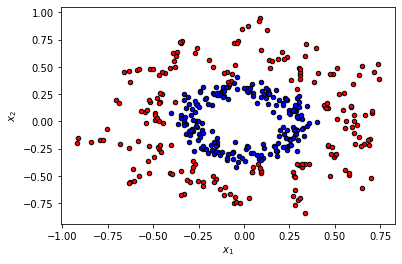

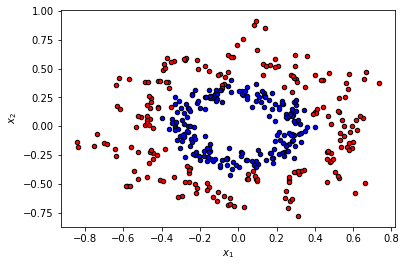

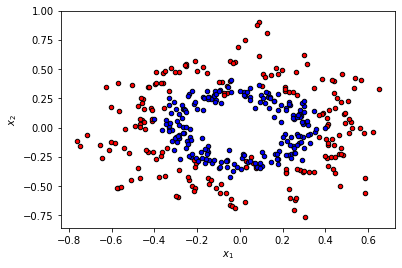

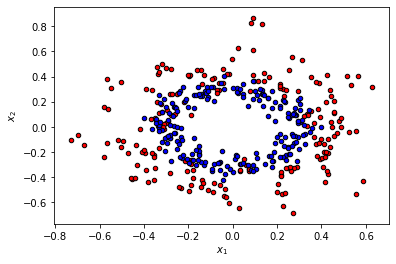

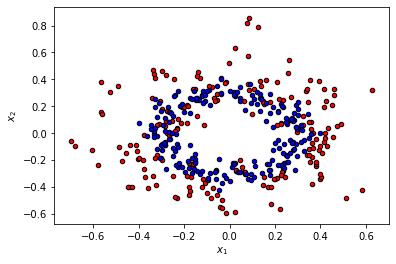

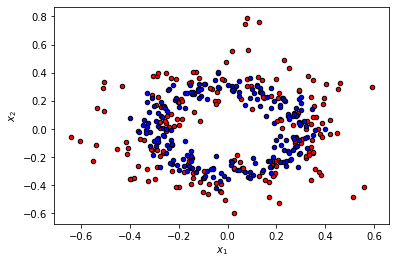

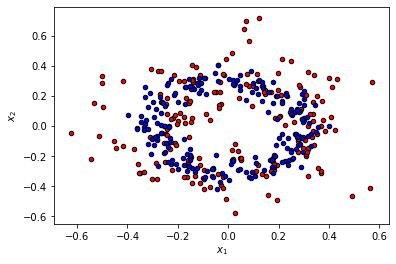

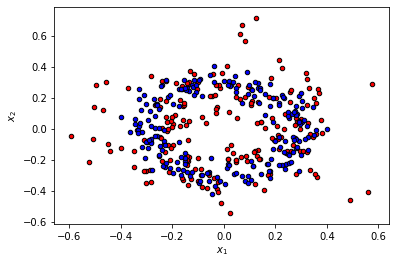

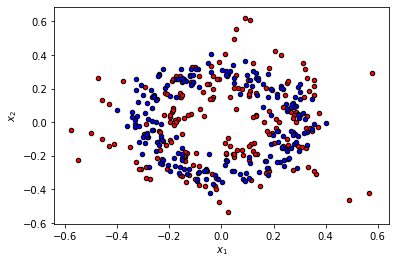

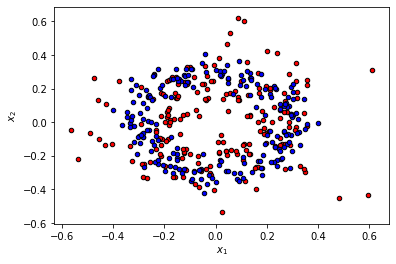

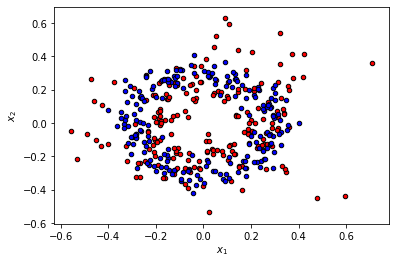

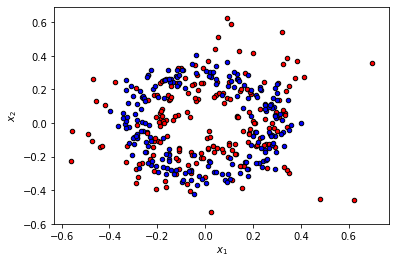

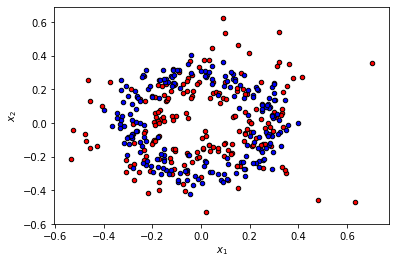

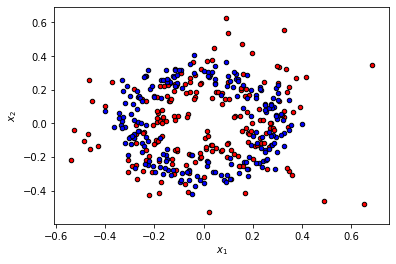

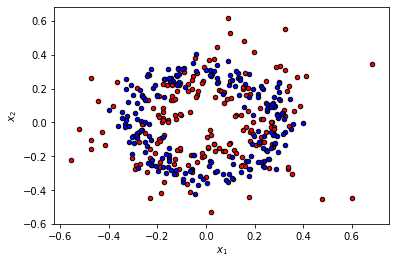

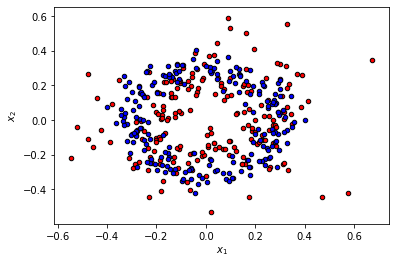

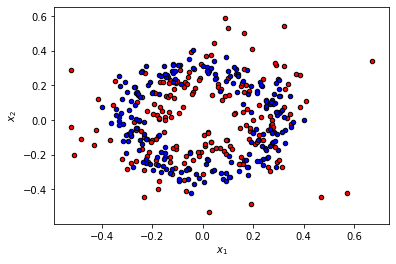

In [133]:

for d in range(30):
    kpca2.fit(X[reds,:])
    X_kpca2 = kpca2.transform(X)
    Xk = np.copy(X_kpca2 )

    sel = list(range(Xk.shape[1]))
    sel.remove(d)

    X_kpca2[:,d:] = 0
    primo =  Xk - X_kpca2
    X_prime0 = kpca2.inverse_transform(Xk)
    X_prime = kpca2.inverse_transform(primo)
    X_prime2 = X -  1 * kpca2.inverse_transform(X_kpca2)


    plt.scatter(X_prime2[reds, 0], X_prime2[reds, 1], c="red",
                s=20, edgecolor='k')
    plt.scatter(X_prime2[blues, 0], X_prime2[blues, 1], c="blue",
                s=20, edgecolor='k')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()


In [55]:
X_kpca2

array([[-0.05334396,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.47759205,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.30242217,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.0530003 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04419045,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04404882,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [52]:
X_prime = X - X_back2

In [45]:
X_prime.shape

(400, 2)

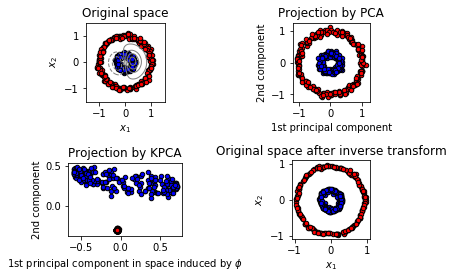

In [25]:
# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0

blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()

Text(0, 0.5, '$x_2$')

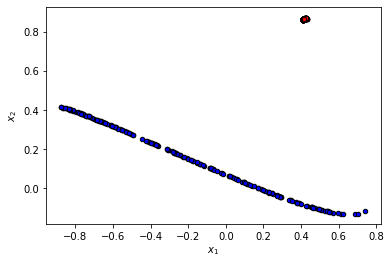

Text(0, 0.5, '$x_2$')

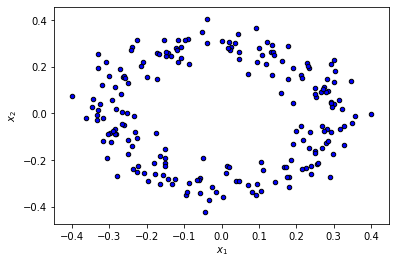

In [57]:
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")